In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 

In [28]:

def likelihood_gaussian(x, mean, sigma):
    L = 1/np.sqrt((2 * np.pi * sigma)) * np.exp(- ((x-mean)**2)/ (2 * sigma))
    return L

def likelihood(data, function, **kwargs):
    L = np.prod(function(data, **kwargs))
    return L

def ln_likelihood(data, function, **kwargs):
    L =  np.sum(np.log(function(data, **kwargs)))
    return L
    



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

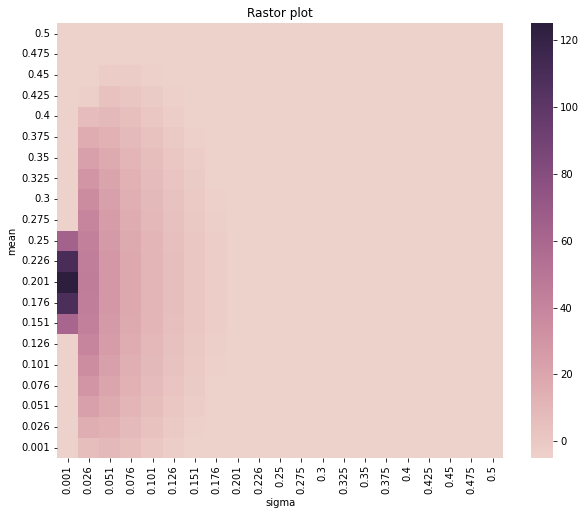

In [48]:
true_mean = 0.2
true_sigma = 0.01
mean_guess = np.linspace(0.001,0.5,21)
sigma_guess = np.linspace(0.001,0.5,21)

data = np.random.normal(loc=true_mean, scale=true_sigma, size=50)


scan_matrix = []

for i in mean_guess:
    LNN_list = []
    for j in sigma_guess:
        L = ln_likelihood(data, likelihood_gaussian, mean = i, sigma = j)
        LNN_list.append(L)
    scan_matrix.append(LNN_list)




fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(scan_matrix, ax = ax, cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=sigma_guess.round(3), yticklabels=mean_guess.round(3), vmin=-5)
ax.set(xlabel="sigma", ylabel="mean", title = 'Rastor plot')
ax.invert_yaxis()

print(np.max(scan_matrix), scan_matrix.index(np.max(scan_matrix)))
